In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [406]:
def showmap(fld):
    xlen = len(fld[0])
    ylen = len(fld)
    df = pd.DataFrame(columns=range(xlen), index=range(ylen), data=fld).T
    df = df.sort_index(ascending=False)
    plt.figure(figsize=(10,10))
    plt.imshow(df)

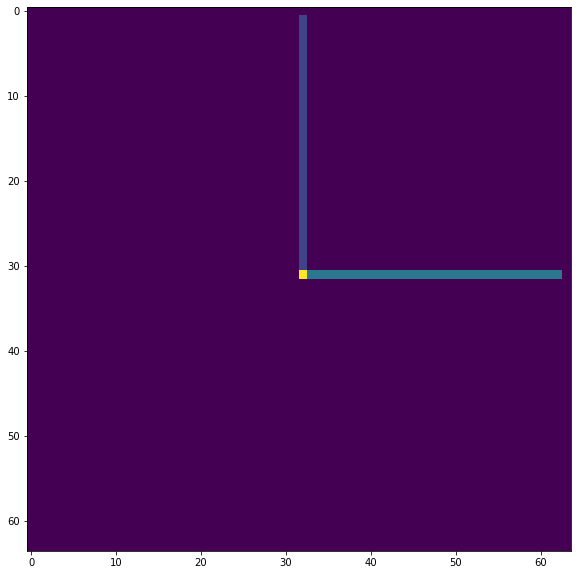

In [407]:
showmap(fld)

In [564]:
MAXINT=int(1e31)
def cmp(x,y):
    return -1 if x < y else 1
def fint(x):
    #return round(x)
    if x > 0:
        return int(x+1e-4)
    else:
        return int(x-1e-4)
def follow(vec, d):
    global MAXINT
    dsqr = d * d
    x,y = vec
    xa = abs(x)
    ya = abs(y)
    xs = cmp(x,0)
    ys = cmp(y,0)
    xi = 0
    yi = 0
    if xa > ya:
        r = ya / xa
        while xi*xi + yi*yi < dsqr:
            yield (xs * xi, ys * fint(yi))
            xi += 1
            yi += r
    else:
        r = xa / ya
        while xi*xi + yi*yi < dsqr:
            yield (xs * fint(xi), ys * yi)
            yi += 1
            xi += r        

def clamp(nv, nmin, nmax):
    if nv < nmin: nv = nmin
    if nv > nmax: nv = nmax
    return nv

def enlighten(p):
    p = 1 - ((1-p)*3/8)
    return p
            
def spill_light(fld, pt, vec, d): 
    x0, y0 = pt
    for x,y in follow(vec, d):
        #print(x0, x, y0, y)
        if fld[x0+x][y0+y] == 0.77:
            break
        else:
            fld[x0+x][y0+y] = enlighten(fld[x0+x][y0+y]+0.1)
    

In [565]:
fint(-0.99999)

-1

In [566]:
list(follow((1,4), 8))

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1, 6), (1, 7)]

In [567]:
def fraction(n,m):
    if n == 0:
        return (1,0)
    while n % 2 == 0:
        n //= 2
        m //= 2
        if n == 1: break
    return (n,m)
def vecs(m=64):
    tmp  = [ fraction(i,m) for i in range(m+1) ]
    for xs,ys in [(1,1), (-1, -1)]:
        for x,y in tmp:
            yield (xs * x, ys * y)
            if x != y and x != 0 and y != 0:
                yield (ys * y, xs * x)
        for x,y in tmp:
            yield (-ys * y, xs * x)
            if x != y and x != 0 and y != 0:
                yield (xs * x, -ys * y)
        

In [568]:
list(vecs(2))

[(1, 0),
 (1, 2),
 (2, 1),
 (1, 1),
 (0, 1),
 (-2, 1),
 (1, -2),
 (-1, 1),
 (-1, 0),
 (-1, -2),
 (-2, -1),
 (-1, -1),
 (0, -1),
 (2, -1),
 (-1, 2),
 (1, -1)]

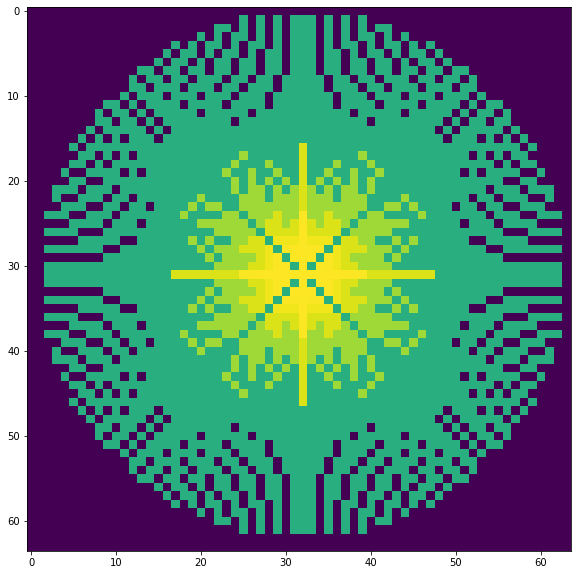

In [569]:
fld = [
    [ 0.0 for r in range(64) ] for c in range(64)
]
pt = (32, 32)
d = 31
#spill_light(fld, pt, (1,0), d)
#spill_light(fld, pt, (1,1), d)
#spill_light(fld, pt, (2,1), d)
#spill_light(fld, pt, (1,2), d)
for v in vecs(16):
    spill_light(fld, pt, v, d)
showmap(fld)

In [570]:
list(vecs(2))

[(1, 0),
 (1, 2),
 (2, 1),
 (1, 1),
 (0, 1),
 (-2, 1),
 (1, -2),
 (-1, 1),
 (-1, 0),
 (-1, -2),
 (-2, -1),
 (-1, -1),
 (0, -1),
 (2, -1),
 (-1, 2),
 (1, -1)]

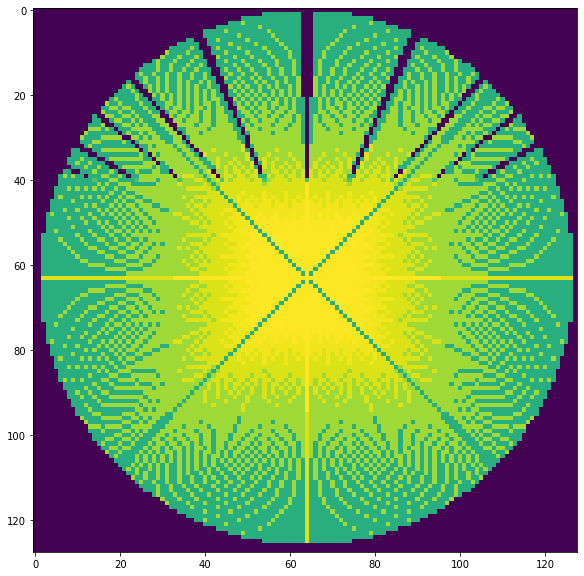

In [589]:
SIZE=128
fld = [
    [ 0.0 for r in range(SIZE) ] for c in range(SIZE)
]



pt = (SIZE//2, SIZE//2)

for i in range(pt[0]-50, pt[0]+50, 10):
    fld[i][pt[1]+23] = 0.77
    
d = 63
#spill_light(fld, pt, (-3,4), d)
#spill_light(fld, pt, (-1,2), d)
#spill_light(fld, pt, (-1,1), d)
#spill_light(fld, pt, (-1,4), d)
#spill_light(fld, pt, (0, 1), d)
#spill_light(fld, pt, (-1, 0), d)
for v in vecs(64):
    spill_light(fld, pt, v, d)
#fld[pt[0]][pt[1]] = 0.2
showmap(fld)

In [559]:
#spill_light(fld, pt, (1,0), d)
#spill_light(fld, pt, (0,1), d)

In [560]:
#spill_light(fld, pt, (8,1), d)
#spill_light(fld, pt, (16, 1), d)
#spill_light(fld, pt, (32, 3), d)

In [561]:
#spill_light(fld, pt, (1,16),d)
#spill_light(fld, pt, (1,8), d)
#spill_light(fld, pt, (3,16),d)

In [562]:
#spill_light(fld, pt, (1,1), d)
#spill_light(fld, pt, (15,16), d)
#spill_light(fld, pt, (17,16), d)
#spill_light(fld, pt,)

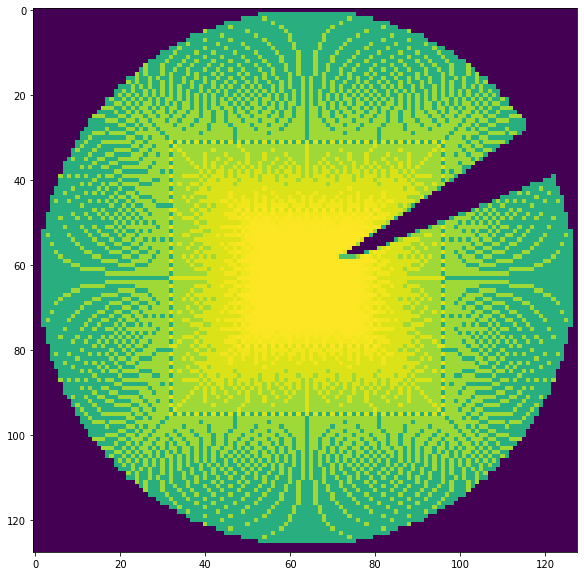

In [563]:
showmap(fld)

In [54]:
spill_light(fld, (128,128), (2,1))

TypeError: 'NoneType' object is not iterable

In [25]:
def illuminate(fld, pt):
    origin = pt
    for vec in p[[-1,-1],[1,1],[-1,1],[1,-1]]
        vec = [h,v]
        spill_light(fld, origin, vec)

SyntaxError: invalid syntax (<ipython-input-25-fa2b71ad5edc>, line 1)

In [ ]:
illuminate(fld, (50,50))